Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Shashidhar Gollamudi - 6120
       Sunny Huang - 4120


Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# # 6120 DATA
# TRAIN_FILE = "Sentences_train.txt"
# DEV_FILE = "Sentences_dev.txt"
# train_tups = sutils.generate_tuples_from_file_new(TRAIN_FILE)
# dev_tups = sutils.generate_tuples_from_file_new(DEV_FILE)

x_train, y_train = train_tups
x_dev, y_dev = dev_tups

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

# USING SUTILS FUNCTIONS SLOWS DOWN MODEL.FIT ALOT
# vocab = sutils.create_index(x_train)
# x_train_vectors = sutils.featurize(vocab, x_train, binary=False)
# x_dev_vectors = sutils.featurize(vocab, x_dev, binary=False)

x_train_sents = [' '.join(review) for review in x_train]
x_dev_sents = [' '.join(review) for review in x_dev]

count_vectorizer = CountVectorizer(binary=False)
count_vectorizer.fit(x_train_sents)

count_vectorizer_binomial = CountVectorizer(binary=True)
count_vectorizer_binomial.fit(x_train_sents)

x_train_vectors = count_vectorizer.transform(x_train_sents)
x_dev_vectors = count_vectorizer.transform(x_dev_sents)

x_train_vectors_binomial = count_vectorizer_binomial.transform(x_train_sents)
x_dev_vectors_binomial = count_vectorizer_binomial.transform(x_dev_sents)

vocab = count_vectorizer.get_feature_names_out()

print(f'Vocab size: {len(vocab)}')

Vocab size: 22596


In [3]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to
num_epochs = 3
hidden_units = 100

# create/compile your model in this cell
model = Sequential()

model.add(Dense(units=hidden_units, activation="relu", input_dim=len(vocab)))

# put in an output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()
# call compile here
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2259700   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2259801 (8.62 MB)
Trainable params: 2259801 (8.62 MB)


Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How many trainable parameters does your model have? __2,259,801__

In [4]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

model.fit(x_train_vectors, np.array(y_train), epochs=num_epochs, verbose=1)

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array



Epoch 1/3
50/50 [==============================] - 1s 7ms/step - loss: 0.6775 - accuracy: 0.5794
Epoch 2/3
50/50 [==============================] - 0s 7ms/step - loss: 0.6197 - accuracy: 0.6812
Epoch 3/3
50/50 [==============================] - 0s 7ms/step - loss: 0.5879 - accuracy: 0.7138


In [5]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
preds = model.predict(x_dev_vectors, verbose=1)
preds = [np.round(pred[0]) for pred in preds]
print(preds)

7/7 [==============================] - 0s 1ms/step
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0

In [6]:
# use the model.evaluate function to report the loss and accuracy on the dev set
metrics = model.evaluate(x_dev_vectors, np.array(y_dev), verbose=1)
print(f'Loss: {metrics[0]}')
print(f'Accuracy: {metrics[1]}')

7/7 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.6850
Loss: 0.6082414984703064
Accuracy: 0.6850000023841858


Epoch 1/3
50/50 [==============================] - 1s 7ms/step - loss: 0.6810 - accuracy: 0.5819
Epoch 2/3
50/50 [==============================] - 0s 7ms/step - loss: 0.6259 - accuracy: 0.6700
Epoch 3/3
50/50 [==============================] - 0s 7ms/step - loss: 0.5916 - accuracy: 0.7031
F1 Score for multinomial: 0.7068965517241379
Epoch 1/3
50/50 [==============================] - 1s 7ms/step - loss: 0.6836 - accuracy: 0.5813
Epoch 2/3
50/50 [==============================] - 0s 7ms/step - loss: 0.6542 - accuracy: 0.7056
Epoch 3/3
50/50 [==============================] - 0s 7ms/step - loss: 0.6207 - accuracy: 0.8106
F1 Score for binomial: 0.7807017543859649
Epoch 1/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6959 - accuracy: 0.5188
Epoch 2/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6854 - accuracy: 0.6125
Epoch 3/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6753 - accuracy: 0.6812
Epoch 1/3
10/10 [=============================

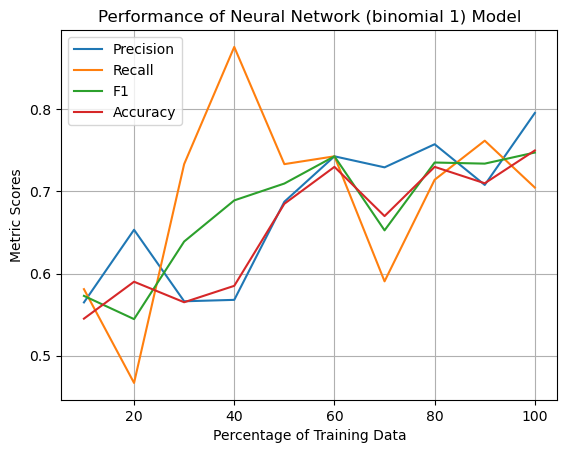

Epoch 1/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.5562
Epoch 2/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6803 - accuracy: 0.6375
Epoch 3/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6698 - accuracy: 0.7000
Epoch 1/3
10/10 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5406
Epoch 2/3
10/10 [==============================] - 0s 7ms/step - loss: 0.6780 - accuracy: 0.6187
Epoch 3/3
10/10 [==============================] - 0s 8ms/step - loss: 0.6653 - accuracy: 0.7281
Epoch 1/3
15/15 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5146
Epoch 2/3
15/15 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.6396
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 0.6644 - accuracy: 0.7396
Epoch 1/3
20/20 [==============================] - 0s 7ms/step - loss: 0.6895 - accuracy: 0.5359
Epoch 2/3
20/20 [===================

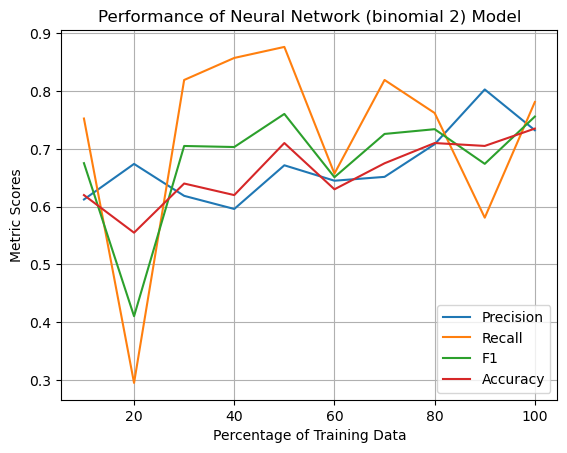

Epoch 1/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.5750
Epoch 2/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6796 - accuracy: 0.6438
Epoch 3/3
5/5 [==============================] - 0s 7ms/step - loss: 0.6697 - accuracy: 0.7188
Epoch 1/3
10/10 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5281
Epoch 2/3
10/10 [==============================] - 0s 7ms/step - loss: 0.6811 - accuracy: 0.6313
Epoch 3/3
10/10 [==============================] - 0s 7ms/step - loss: 0.6705 - accuracy: 0.7250
Epoch 1/3
15/15 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.5521
Epoch 2/3
15/15 [==============================] - 0s 7ms/step - loss: 0.6758 - accuracy: 0.6646
Epoch 3/3
15/15 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.7437
Epoch 1/3
20/20 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.5484
Epoch 2/3
20/20 [===================

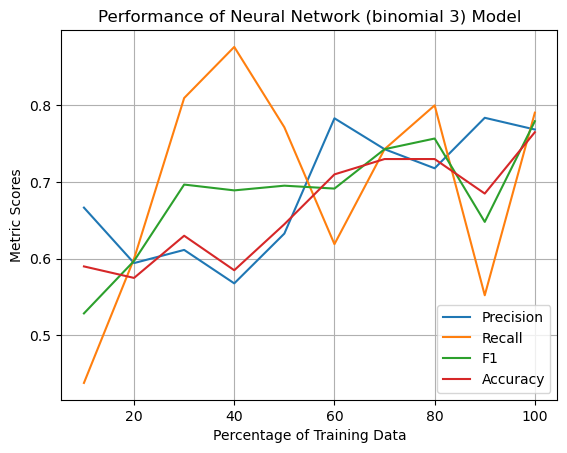

In [7]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)
def nn_metrics_fun(train_feats, dev_feats, percentage):
    num_epochs = 3
    hidden_units = 100

    model = Sequential()
    model.add(Dense(units=hidden_units, activation="relu", input_dim=len(vocab)))
    # put in an output layer
    model.add(Dense(units=1, activation='sigmoid'))
    # call compile here
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy']
                )
    x_train_vectors, y_train = train_feats
    x_dev_vectors, y_dev = dev_feats

    cutoff = int(len(y_train) * percentage)
    model.fit(x_train_vectors[:cutoff], np.array(y_train[:cutoff]), epochs=num_epochs)
    preds = model.predict(x_dev_vectors, verbose=False)
    preds = [np.round(pred[0]) for pred in preds]
    return y_dev, preds

train_feats = (x_train_vectors, y_train)
dev_feats = (x_dev_vectors, y_dev)

dev_y, preds = nn_metrics_fun(train_feats, dev_feats, 1)
_, _, f1, _ = sutils.get_prfa(dev_y, preds)
print(f'F1 Score for multinomial: {f1}')

train_feats_binomial = (x_train_vectors_binomial, y_train)
dev_feats_binomial = (x_dev_vectors_binomial, y_dev)

dev_y, preds = nn_metrics_fun(train_feats_binomial, dev_feats_binomial, 1)
_, _, f1, _ = sutils.get_prfa(dev_y, preds)
print(f'F1 Score for binomial: {f1}')

for i in range(1, 4):
    sutils.create_training_graph(nn_metrics_fun, 
                                 train_feats_binomial, 
                                 dev_feats_binomial, 
                                 kind=f"Neural Network (binomial {i})", 
                                 savepath=f"figures/neural_net_{i}",
                                 verbose=True)



Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __3__
- multinomial features: __0.6480446927374302__ 
- binarized features: __0.7657657657657657__